#**Task 1** | **Linear Regression** | **KNN Regressor**

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


1. Data Proccessing

In [ ]:
# Importing data set

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weight-height.csv")

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.isnull().sum() # checking missing values

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
df.dtypes # checking the data types for furthur calculation

Gender     object
Height    float64
Weight    float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder # import Label Encoder for encoding Gender column
le = LabelEncoder()

In [ ]:
df.Gender = le.fit_transform(df[['Gender']]) # applying label encoder

In [ ]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [ ]:
from sklearn.model_selection import train_test_split # import train_test_split for spliting train and test data

**2. Seperate x(Gender, Height) and y (y=Weight)**

In [ ]:
x = df[['Gender', 'Height']] # sample data

In [ ]:
y = df[['Weight']] # target value

In [ ]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


**3. Train = 70%, Test = 30%**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=1 ) # storing train and test data

In [ ]:
xtrain.head()

,Gender,Height
1277,1,72.385301
5361,0,60.960147
5728,0,69.119292
4276,1,68.271050
3112,1,64.991405


In [ ]:
ytrain.head()

,Weight
1277,189.165592
5361,124.876796
5728,168.864403
4276,172.941248
3112,144.551044


In [ ]:
xtrain.shape

(5988, 2)

**4. Apply Linear Regression**

---



In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
reg.coef_

array([[19.34359322,  5.96887438]])

In [ ]:
reg.intercept_

array([-244.55280903])

**5. Evaluate Model (Accuracy, MSE, Prediction)**

In [ ]:
reg.predict([[1, 65]])

array([[162.76761916]])

In [ ]:
# Evaluating Prediction

reg.predict(xtest)

array([[143.83013436],
       [197.53417989],
       [184.63515112],
       ...,
       [160.7078525 ],
       [186.82852694],
       [201.4226542 ]])

In [ ]:
reg.score(xtrain, ytrain) # training accuracy

0.8972135459668117

In [ ]:
# Evaluating Accuracy

reg.score(xtest, ytest) 


0.905995960709116

In [ ]:
xtest.Gender

7154    0
3258    1
2188    1
5609    0
3186    1
       ..
8004    0
7644    0
8521    0
957     1
233     1
Name: Gender, Length: 2567, dtype: int64

In [ ]:
# Evaluating MSE

from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ytest, reg.predict(xtest))

99.67250998070033

**6. Apply KNN Regressor**

---



In [ ]:
from sklearn.neighbors import KNeighborsRegressor 

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=100) # creating KN object with 100 nearest neighbors

In [ ]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=100)

**7. Evaluate Model (Accuracy, MSE, Prediction)**

In [ ]:
neigh.predict(xtest)

array([[142.83375838],
       [198.29567688],
       [185.1495741 ],
       ...,
       [159.8721488 ],
       [185.95631787],
       [201.0705108 ]])

In [ ]:
neigh.predict([[1,65]])

array([[163.31543219]])

In [ ]:
mean_squared_error(ytest, neigh.predict(xtest))

104.01856360504236

In [ ]:
neigh.score(xtrain, ytrain)

0.8951986621897327

In [ ]:
neigh.score(xtest, ytest)


0.9018970712987657

In [ ]:
# Applying KN with distance weights

from sklearn.neighbors import KNeighborsRegressor 
neigh_dist = KNeighborsRegressor(n_neighbors=100,weights='distance')  


In [ ]:
neigh_dist.fit(xtrain, ytrain)


KNeighborsRegressor(n_neighbors=100, weights='distance')

In [ ]:
neigh_dist.predict(xtest)

array([[147.31970293],
       [197.69135175],
       [182.7188573 ],
       ...,
       [159.11029304],
       [184.29795044],
       [201.38616438]])

In [ ]:
# neigh_dist.predict([[1, 65]])

In [ ]:
neigh_dist.score(xtrain, ytrain) #training accuracy

1.0

In [ ]:
neigh_dist.score(xtest, ytest) # testing Accuracy


0.8870187575183935

In [ ]:
mean_squared_error(ytest, neigh_dist.predict(xtest)) # MSE


119.79404399882942

In [ ]:
neigh_dist.effective_metric_ # checking the distance measuring alogrithm

'euclidean'

In [ ]:
neigh_dist.n_features_in_ # checking number of features to calculate

2

In [ ]:
neigh_dist.feature_names_in_ # checking features name

array(['Gender', 'Height'], dtype=object)

In [ ]:
neigh_dist.n_samples_fit_ 

5988

In [ ]:
neigh_dist.kneighbors([[1,65]],n_neighbors=5, return_distance=True) #Returns first 5 nearest distance and its indices

(array([[0.00080633, 0.00189643, 0.00492174, 0.00710846, 0.00859549]]),
 array([[2717, 3446, 3412, 3884,    4]]))

**8. Compare with KNN model and Linear Regression**

---



In [ ]:
# MSE,Accuracy Linear Regression

LR = mean_squared_error(ytest, reg.predict(xtest))
LRA = reg.score(xtest, ytest)

# MSE,Accuracy K-Neighbors

KR = mean_squared_error(ytest, neigh.predict(xtest))
KRA = neigh.score(xtest, ytest) 

# MSE,Accuracy K-Neighbors with distance

KRW = mean_squared_error(ytest, neigh_dist.predict(xtest))
KRWA = neigh_dist.score(xtest, ytest) 


comp = {'LR': [LR, LRA], 'KR': [KR,KRA], 'KRW': [KRW,KRWA] }
tbl = pd.DataFrame(data=comp, index=['Error', 'Accuracy'])

In [ ]:
tbl

,LR,KR,KRW
Error,99.672510,123.153659,145.604452
Accuracy,0.905996,0.883850,0.862676


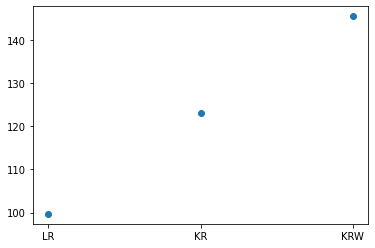

In [ ]:
# Plotting MSE with their corresponding MODEL
plt.scatter(tbl.columns, tbl.iloc[0])

By Observing the plot we assume that its good to use Linear Regression for more accurate prediction.

#**Task 2** | **KNN CLASSIFIER**

---



**1. Import Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_class = KNeighborsClassifier()

In [ ]:
n1_class = KNeighborsClassifier(weights='distance')

**2. Seperate x and (y=Gender)**

In [ ]:
x1 = df[['Height', 'Weight']]
y1 = df[['Gender']]

**3. Train = 70%, Test = 30%**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.30, random_state=1 )


**4. Apply KNN Classifier**

In [ ]:
n_class.fit(x_train, y_train) # training uniform weights

KNeighborsClassifier()

In [ ]:
n1_class.fit(x_train, y_train) # distance weights

KNeighborsClassifier(weights='distance')

In [ ]:
n = n_class.predict(x_test)
n.shape

(2567,)

**5. Evaluate Model by Accuracy and prediction**

In [ ]:
n1_class.predict(x_test) 


array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
n_class.predict([[80, 200]])

array([1])

In [ ]:
n1_class.predict([[80,200]])

array([1])

In [ ]:
n_class.score(x_test, y_test) # Accuracy with uniform weights

0.9146864043630697

In [ ]:
n1_class.score(x_test, y_test) # accuracy with distance weights


0.905336969224776